# **University Life in Udine**

## *Analysis of House Sale and Rent Cost in Province of Udine*

If you have decided to move to Udine or the municipalities in its province, you will find all the information you need here. 

### **Some info about the notebook**

In this notebook there will be content designed specifically for users, others for programmers.

This distinction is made explicit by the use of the following icons:
- User 🧍‍♂️
- Programmer 👨‍💻

---

## **Setup** 👨‍💻 

We import the necessary libraries for the notebook to correctly work.

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import leafmap

# Import custom modules
from functions.dataviz_folium import *

print("> Setup Completed")

> Setup Completed


## **Import Data** 👨‍💻 

We import the necessary data for analysis and representations.

First, we import the shape files.

In [3]:
# import data on Italian municipalities
italy_municipalities_path = "../data/Com01012021_g/Com01012021_g_WGS84.shp"
italy_municipalities = gpd.read_file(italy_municipalities_path)

# save Udine and the municipalities in the province of Udine
udine_geodf = italy_municipalities.loc[italy_municipalities["COMUNE"] == "Udine"]
udine_mun_geodf = italy_municipalities.loc[italy_municipalities["COD_PROV"] == 30]

It follows a simple plot.

<AxesSubplot:>

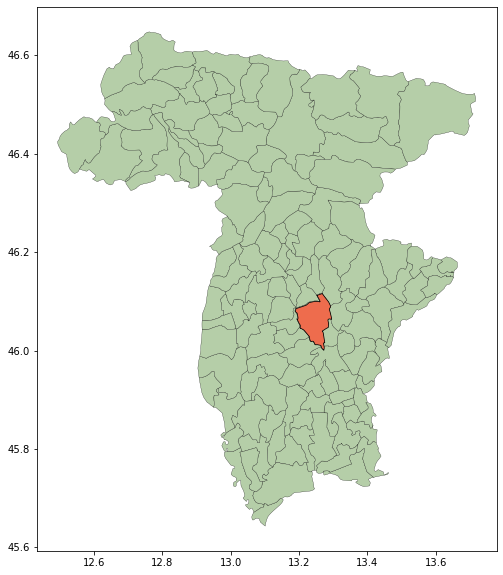

In [4]:
# create the base plot with the municipalities
base = udine_mun_geodf.to_crs(epsg=4326).plot(
    figsize=(20, 10),
    color="#b5cea8",
    edgecolor="k",
    linewidth = 0.25
    )

# plot Udine hover its municipalities
udine_geodf.to_crs(epsg=4326).plot(
    facecolor='none', 
    ax=base,
    color="#EE6C4D",
    edgecolor="k",
    linewidth = 0.75
    )

We now import the data about the house cost and apartment rents of the municipalities of Udine.

*Source: [https://www.immobiliare.it/mercato-immobiliare/friuli-venezia-giulia/udine-provincia/](https://www.immobiliare.it/mercato-immobiliare/friuli-venezia-giulia/udine-provincia/)*

*The source is updated to December 2021.*

In [5]:
udine_mun_house_cost = pd.read_csv("../data/udine_municipalities_house_cost.csv")
udine_mun_house_cost

Municipality  Sale  Rent
0                Udine  1504  7.91
1    Aiello del Friuli   946  6.74
2                Amaro   613  5.90
3              Ampezzo   608  6.02
4             Aquileia   968  6.99
..                 ...   ...   ...
129            Venzone   613  5.92
130          Verzegnis   480  5.90
131      Villa Santina   649  5.90
132              Visco   700  6.40
133             Zuglio   462  5.90

[134 rows x 3 columns]

Let's add the data to the GeoDataFrame.

In [6]:
# check that the number of municipalities matches

print("Municipalities in GeoDataFrame:", len(udine_mun_geodf["geometry"]))
print("Municipalities in HouseCost df:", len(udine_mun_house_cost["Municipality"]))

Municipalities in GeoDataFrame: 134
Municipalities in HouseCost df: 134


The accounts add up, we can perform a join.

In [7]:
udine_mun_geodf_with_cost = pd.merge(udine_mun_geodf, udine_mun_house_cost, left_on='COMUNE', right_on='Municipality', how='left')
udine_mun_geodf_with_cost[["COMUNE","geometry","Municipality","Sale","Rent"]].head()

COMUNE                                           geometry  \
0  Aiello del Friuli  POLYGON ((839183.531 5090784.049, 839213.968 5...   
1              Amaro  POLYGON ((815571.541 5148741.150, 816172.975 5...   
2            Ampezzo  POLYGON ((789780.844 5154195.205, 789796.845 5...   
3           Aquileia  POLYGON ((841232.696 5081056.617, 841292.009 5...   
4         Arta Terme  POLYGON ((813118.877 5158452.582, 813153.940 5...   

        Municipality  Sale  Rent  
0  Aiello del Friuli   946  6.74  
1              Amaro   613  5.90  
2            Ampezzo   608  6.02  
3           Aquileia   968  6.99  
4         Arta Terme   663  5.90

## **Choropleth** 🧍‍♂️

Let's create some visualizations.

### **Static Maps**

We first create simple Choropleth based on the average price of houses and rentals in the province of Udine.

#### **House Sale Prices**

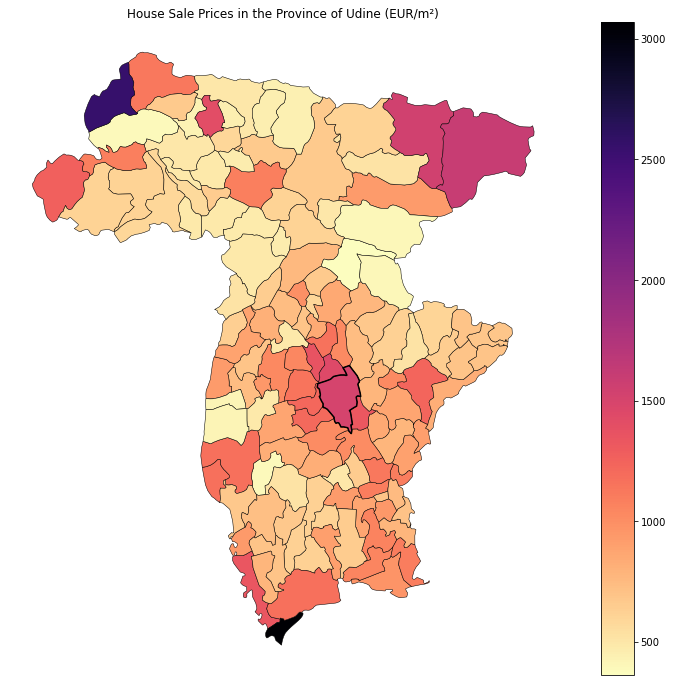

In [8]:
# create base plot with municipality color based on "Sale"
base = udine_mun_geodf_with_cost.to_crs(epsg=4326).plot(
    column='Sale',
    cmap="magma_r", 
    edgecolor="k", 
    linewidth=0.5,
    legend=True,
    figsize=(15,12)
    )

# make udine easily recognisable by adding its borders
udine_geodf.to_crs(epsg=4326).boundary.plot(
    facecolor='none', 
    ax=base,
    color="k",
    linewidth = 1.5
    )

base.set_axis_off()
base.set_title('House Sale Prices in the Province of Udine (EUR/m\u00b2)')
plt.show()

#### **House Rent Prices**

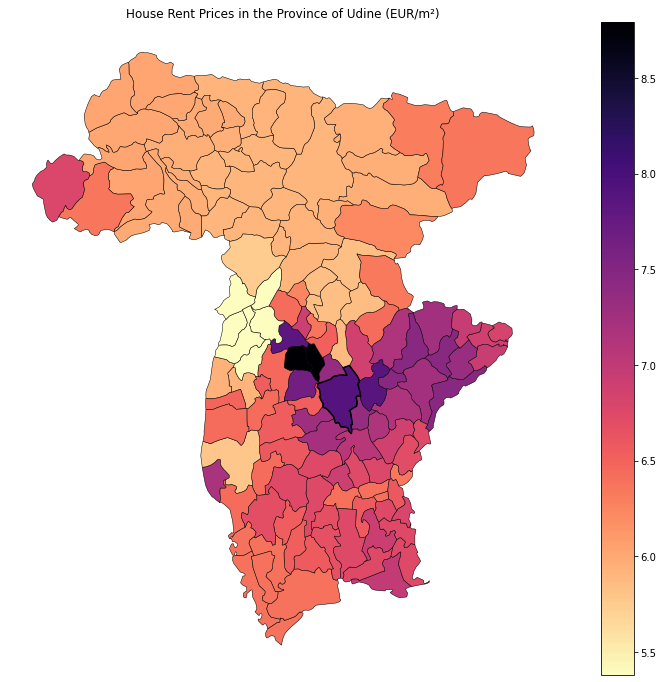

In [9]:
# create base plot with municipality color based on "Rent"
base = udine_mun_geodf_with_cost.to_crs(epsg=4326).plot(
    column='Rent',
    cmap="magma_r", 
    edgecolor="k", 
    linewidth=0.5,
    legend=True,
    figsize=(15,12)
    )

# make udine easily recognisable by adding its borders
udine_geodf.to_crs(epsg=4326).boundary.plot(
    facecolor='none', 
    ax=base,
    color="k",
    linewidth = 1.5
    )

base.set_axis_off()
base.set_title('House Rent Prices in the Province of Udine (EUR/m\u00b2)')
plt.show()

### **Interactive Maps**

Now let's create an interactive version of the choropleths, facilitating the exploration of the territory.

#### **Setup**

In [10]:
# setup
udine_lat = 46.0609604
udine_lon = 13.1980551
list_of_layers = ['Stamen Terrain','cartodbpositron']

#### **House Sale Prices**

In [11]:
interactive_map = create_folium_map_choropleth(
    lat=udine_lat, 
    lon=udine_lon,
    list_of_layers=list_of_layers,
    geodf=udine_mun_geodf_with_cost,
    column="Sale"
    )

interactive_map

> Adding multiple layers
> Adding Choropleth
> Adding Tooltips and Popups
> Interactive Map Created


#### **House Rent Prices**

In [12]:
interactive_map = create_folium_map_choropleth(
    lat=udine_lat, 
    lon=udine_lon,
    list_of_layers=list_of_layers,
    geodf=udine_mun_geodf_with_cost,
    column="Rent"
    )

interactive_map

> Adding multiple layers
> Adding Choropleth
> Adding Tooltips and Popups
> Interactive Map Created


#### **Save Maps**

We save the maps as .html, so that they can then be incorporated into other websites.

In [13]:
interactive_map = create_folium_map_choropleth(
    lat=udine_lat, 
    lon=udine_lon,
    list_of_layers=list_of_layers,
    geodf=udine_mun_geodf_with_cost,
    column="Sale"
    )

interactive_map.save("../dataviz/interactive_map_house_sale.html")

interactive_map = create_folium_map_choropleth(
    lat=udine_lat, 
    lon=udine_lon,
    list_of_layers=list_of_layers,
    geodf=udine_mun_geodf_with_cost,
    column="Rent"
    )

interactive_map.save("../dataviz/interactive_map_house_rent.html")

> Adding multiple layers
> Adding Choropleth
> Adding Tooltips and Popups
> Interactive Map Created
> Adding multiple layers
> Adding Choropleth
> Adding Tooltips and Popups
> Interactive Map Created
